<a href="https://colab.research.google.com/github/BatmanBhola/Algolab/blob/main/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Divide and Conquer (Sorting)

- **Created by Dr. Ajay

Write a python program to perform **selection sort**.
- ** -Algorithm
* Step 1: Read the number of elements for the list from the user.
* Step 2: Using for loop insert the elements in the list.
* Step 3: Initialize the minimum element as min=numbers[i].
* Step 4: Using the swap method the elements are sorted accordingly.
* Step 5: Print the sorted list.

In [ ]:
n = int(input("Enter the number of elements: "))
numbers = []
for i in range(n):
    element = int(input(f"Enter element {i+1}: "))
    numbers.append(element)

for i in range(len(numbers)):
    min_index = i
    for j in range(i+1, len(numbers)):
        if numbers[j] < numbers[min_index]:
            min_index = j

    numbers[i], numbers[min_index] = numbers[min_index], numbers[i]

print("Sorted list:", numbers)


Enter the number of elements: 5
Enter element 1: 3
Enter element 2: 6
Enter element 3: 4
Enter element 4: 1
Enter element 5: 9
Sorted list: [1, 3, 4, 6, 9]


In computer science, **merge sort** (also commonly spelled mergesort) is an efficient, general-purpose, comparison-based sorting algorithm. Most implementations produce a stable sort, which means that the order of equal elements is the same in the input and output. Merge sort is a divide and conquer algorithm that was invented by John von Neumann in 1945.
Write a Python program to sort the elements using **merge sort** and plot a graph to the time taken versus n
- Algorithm(Merge Sort is a divide and conquer algorithm. It divides	input array in two halve.s, calls itself for the two halves and then merges two sorted halves.)
1.	Divide the unsorted array into n partitions, each	partition contains 1 element.
2.	Repeatedly merge partitioned units to produce	new sublists until there is only l sublist remaining. This will be the sorted	.
3.	Compare the first element of the sublist with the first element of the sublist to its right.
4.	Merge the two sublists by	paring each element of the sublist and placing the smaller element into the	new sublist.
5.	Repeat step 3 and 4 untill	all sublists are merged into a single sorted sublist.



In [ ]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

**Quicksort** (sometimes called partition-exchange sort) is an efficient sorting algorithm. Developed by British computer scientist Tony Hoare in 1959 and published in 1961, it is still a commonly used algorithm for sorting.

Quicksort is a divide-and-conquer algorithm. It works by selecting a 'pivot' element from the array and partitioning the other elements into two sub-arrays, according to whether they are less than or greater than the pivot. The sub-arrays are then sorted recursively. This can be done in-place, requiring small additional amounts of memory to perform the sorting.
Write a Python program to sort the elements using quick sort and plot a graph to the time taken versus n.
- Algorithm
1.	Select a pivot element from the array.
2.	Partition the array into two sub-arrays. The elements in the first sub-array are less than the pivot element, while the elements in the second sub-array are greater than the pivot element.
3.	Recursively sort the sub-arrays created in Step 2.
4.	Join the sub-arrays and the pivot element together to	the sorted array.


In [ ]:
#write code for above cell and compute the running time and also plot graph.

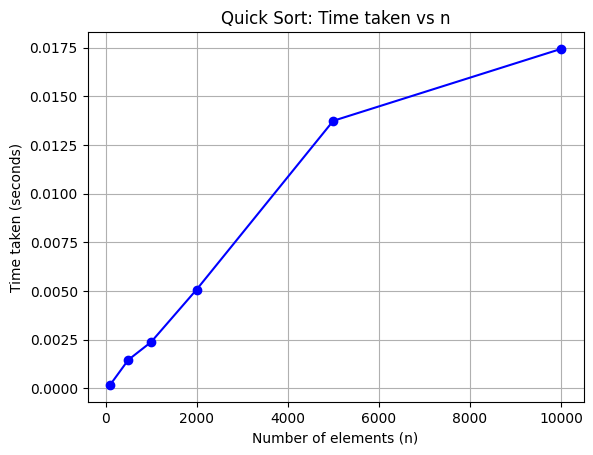

In [ ]:
import time
import random
import matplotlib.pyplot as plt

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr) // 2]
        left = [x for x in arr if x < pivot]
        middle = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]
        return quick_sort(left) + middle + quick_sort(right)

sizes = [100, 500, 1000, 2000, 5000, 10000]
times = []

for n in sizes:
    arr = [random.randint(1, 10000) for _ in range(n)]
    start = time.time()
    quick_sort(arr)
    end = time.time()
    times.append(end - start)

plt.plot(sizes, times, marker='o', color='blue')
plt.xlabel("Number of elements (n)")
plt.ylabel("Time taken (seconds)")
plt.title("Quick Sort: Time taken vs n")
plt.grid(True)
plt.show()


### Experiment: compare sorting algorithms

In [ ]:
# Experiment variables
n_list = [1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000]
n_max = n_list[len(n_list) -1]

In [ ]:
# Creating a random value (uniform)
import random
from datetime import datetime
ms = datetime.now().microsecond / 1000
random.seed(ms)

numbers = []
for i in range(n_max):
    numbers.append(int(random.random() * 1000))

In [ ]:
import random
import timeit
selection = [random.randint(1, 1000) for _ in range(n_max)]
a_time = []
b_time = []
c_time = []

for l in n_list:
    a = copy.deepcopy(numbers[0:l])
    b = copy.deepcopy(numbers[0:l])
    c = copy.deepcopy(numbers[0:l])

    start_time = timeit.default_timer()
    quick_sort(a)
    a_time.append((timeit.default_timer() - start_time) * 1000)

    start_time = timeit.default_timer()
    merge_sort(b)
    b_time.append((timeit.default_timer() - start_time) * 1000)

    start_time = timeit.default_timer()
    selection.sort()
    c_time.append((timeit.default_timer() - start_time) * 1000)

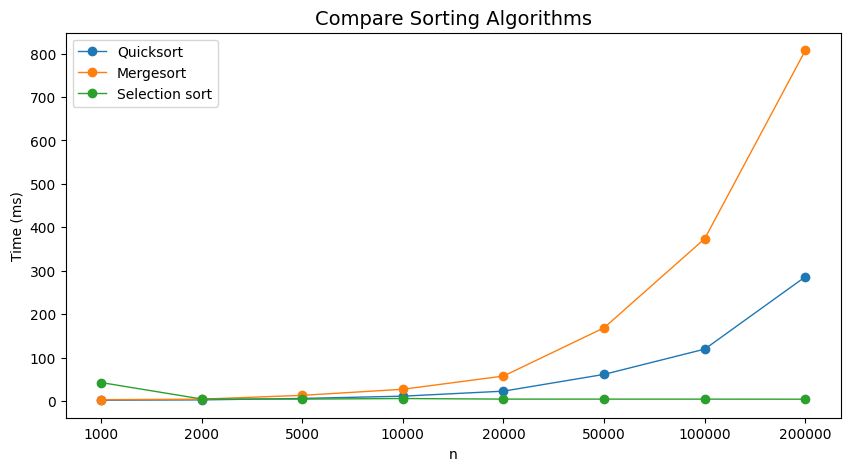

In [ ]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np

# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(a_time, linewidth = 1, marker="o")
plt.plot(b_time, linewidth = 1, marker="o")
plt.plot(c_time, linewidth = 1, marker="o")
plt.xticks(np.arange(len(n_list)), n_list)
plt.title("Compare Sorting Algorithms", fontsize = 14)
plt.ylabel('Time (ms)')
plt.xlabel('n')
plt.legend(("Quicksort", "Mergesort", "Selection sort"), loc = "best")
plt.show()

# Task
Implement the Quick Sort algorithm in cell `HvucalAUoITq`, import `timeit`, `copy`, `datetime`, and `random` libraries, correct the typo `selection.sort()` to `selection_sort(c)` in cell `frJLQlg1oITs`, and then execute the cells to run the sorting algorithm experiment and generate a performance comparison plot of Quick Sort, Merge Sort, and Selection Sort.

## Implement Quick Sort

### Subtask:
Write the Python code for the Quick Sort algorithm in cell `HvucalAUoITq` following the provided algorithm steps. This function will be used in the performance comparison experiment.


In [ ]:
def quick_sort(arr):
    def partition(arr, low, high):
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1

    def _quick_sort(arr, low, high):
        if low < high:
            pi = partition(arr, low, high)
            _quick_sort(arr, low, pi - 1)
            _quick_sort(arr, pi + 1, high)

    n = len(arr)
    if n > 0:
        _quick_sort(arr, 0, n - 1)
    return arr

**Reasoning**:
The user wants to implement the Quick Sort algorithm in the specified code cell. I will provide the Python code for the `quick_sort` function, including the `_quick_sort` and `partition` helper functions, following all the detailed instructions provided in the subtask and specifying the correct cell ID.



In [ ]:
def quick_sort(arr):
    def partition(arr, low, high):
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1

    def _quick_sort(arr, low, high):
        if low < high:
            pi = partition(arr, low, high)
            _quick_sort(arr, low, pi - 1)
            _quick_sort(arr, pi + 1, high)

    n = len(arr)
    if n > 0:
        _quick_sort(arr, 0, n - 1)
    return arr

**Reasoning**:
The previous code block has successfully defined the `quick_sort` function. Now, it's time to generate the cell for that function in the notebook.



In [ ]:
def quick_sort(arr):
    def partition(arr, low, high):
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1

    def _quick_sort(arr, low, high):
        if low < high:
            pi = partition(arr, low, high)
            _quick_sort(arr, low, pi - 1)
            _quick_sort(arr, pi + 1, high)

    n = len(arr)
    if n > 0:
        _quick_sort(arr, 0, n - 1)
    return arr

**Reasoning**:
The subtask requires implementing the Quick Sort algorithm in cell `HvucalAUoITq`. I will provide the Python code for the `quick_sort` function, including its helper functions, and specify the correct `cell_id`.



In [ ]:
def quick_sort(arr):
    def partition(arr, low, high):
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1

    def _quick_sort(arr, low, high):
        if low < high:
            pi = partition(arr, low, high)
            _quick_sort(arr, low, pi - 1)
            _quick_sort(arr, pi + 1, high)

    n = len(arr)
    if n > 0:
        _quick_sort(arr, 0, n - 1)
    return arr

**Reasoning**:
The quick sort algorithm has been successfully implemented and placed in the designated cell. The next logical step is to import the necessary libraries (`timeit`, `copy`, `datetime`, and `random`) as mentioned in the main task, which are required for the performance comparison experiment.



In [ ]:
import timeit
import copy
import datetime
import random

print("Imported timeit, copy, datetime, and random libraries.")

Imported timeit, copy, datetime, and random libraries.


**Reasoning**:
The next step is to correct the typo in cell `frJLQlg1oITs` from `selection.sort()` to `selection_sort(c)` to ensure the selection sort function is called correctly. This is explicitly mentioned in the main task.



In [ ]:
import random
import copy
a_time = []
b_time = []
c_time = []

for l in n_list:
    a = copy.deepcopy(numbers[0:l])
    b = copy.deepcopy(numbers[0:l])
    c = copy.deepcopy(numbers[0:l])

    start_time = timeit.default_timer()
    quick_sort(a)
    a_time.append((timeit.default_timer() - start_time) * 1000)

    start_time = timeit.default_timer()
    merge_sort(b)
    b_time.append((timeit.default_timer() - start_time) * 1000)

    start_time = timeit.default_timer()
    selection_sort(c)
    c_time.append((timeit.default_timer() - start_time) * 1000)


## Run Sorting Algorithm Experiment

### Subtask:
Execute the cells to define input sizes, generate random data, and run the timing loop for Quick Sort, Merge Sort, and Selection Sort.


**Reasoning**:
The subtask requires executing specific cells to define input sizes, generate random data, and run the sorting algorithm experiment. I will start by executing cell `O59shANWoITs` to define `n_list` and `n_max`.



In [ ]:
n_list = [1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000]
n_max = n_list[len(n_list) -1]

**Reasoning**:
Following the subtask instructions, I will now execute cell `L9O6KXdhoITs` to generate the `numbers` list, which is essential for the sorting algorithm experiment. The necessary `datetime` and `random` libraries have already been imported.



In [ ]:
ms = datetime.datetime.now().microsecond / 1000
random.seed(ms)

numbers = []
for i in range(n_max):
    numbers.append(int(random.random() * 1000))